In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "/Volumes/HD-PLFU3/AnalysisResult/"

In [15]:
def phase_add(a, b):
    a_ = np.cos(a) + np.sin(a)*1j
    b_ = np.cos(b) + np.sin(b)*1j
    return np.angle(a_*b_)

def phase_statics(X):
    a = 0
    for x in X: a += ( np.cos(x) + np.sin(x)*1j)
    a /= len(X)
    return np.angle(a), 1-np.abs(a)

def getAngleDensityMap(hist_phase, size = 512):
    img = np.zeros([size, size])
    center = [size / 2, size/2]
    print hist_phase
    for i in range(size): # y 
        for j in range(size): # x
            pos = ( j - center[1] ) + 1j*( i - center[0] )
            if np.abs(pos) < size / 2:
                img[i,j] = hist_phase[int( - ( np.angle( pos ) + np.pi ) / (0.1*np.pi) )]
    return img


In [3]:
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"

0 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0008/


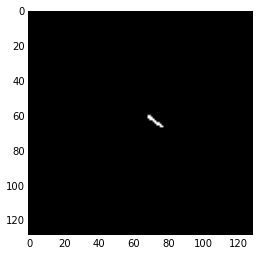

1 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0014/


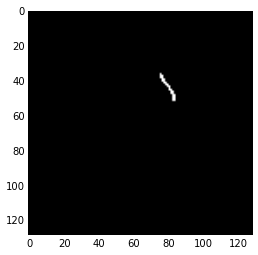

2 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0015/


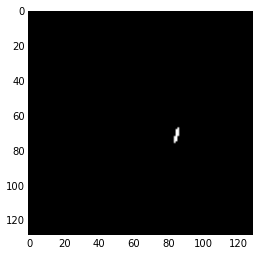

3 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0017/


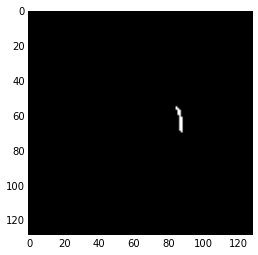

4 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0034/


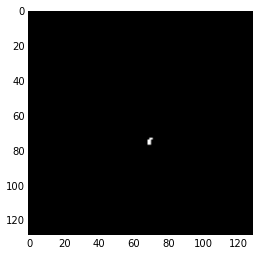

5 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0035/


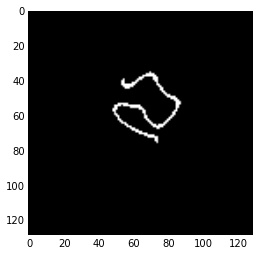

6 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0036/


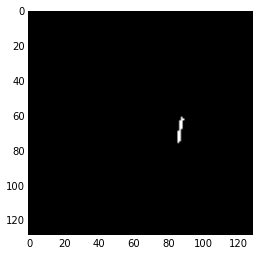

7 /Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0038/


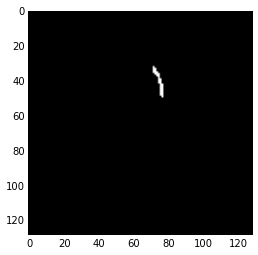

8 /Volumes/HD-PLFU3/AnalysisResult/20160907-3/C001H001S0006/


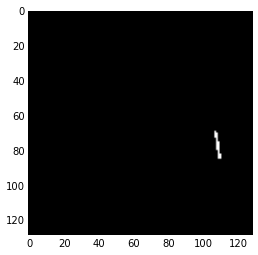

9 /Volumes/HD-PLFU3/AnalysisResult/20160907-3/C001H001S0010/


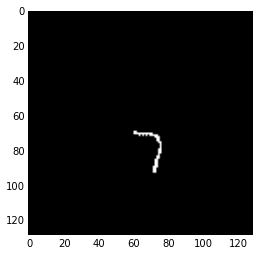

10 /Volumes/HD-PLFU3/AnalysisResult/20160907-3/C001H001S0011/


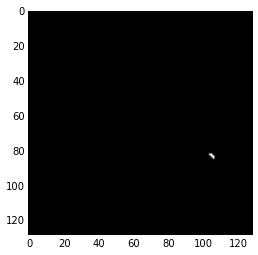

11 /Volumes/HD-PLFU3/AnalysisResult/20160907-3/C001H001S0017/


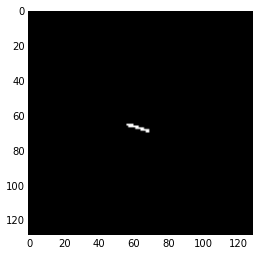

12 /Volumes/HD-PLFU3/AnalysisResult/20160907-3/C001H001S0022/


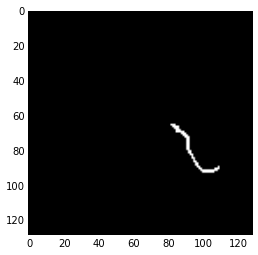

13 /Volumes/HD-PLFU3/AnalysisResult/20161019-1/C001H001S0018/


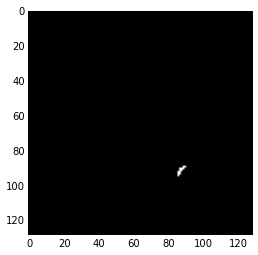

14 /Volumes/HD-PLFU3/AnalysisResult/20161019-1/C001H001S0019/


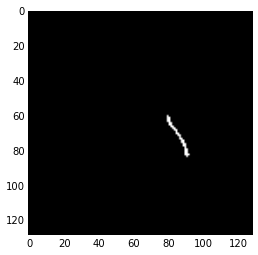

15 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0006/


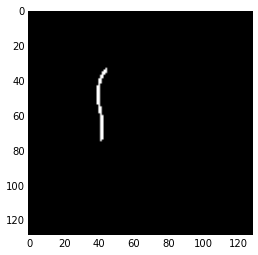

16 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0007/


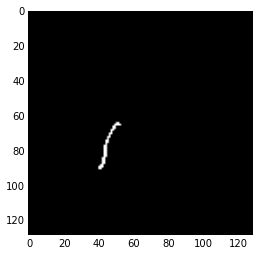

17 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0008/


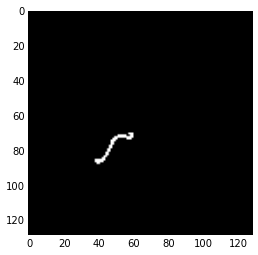

18 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0009/


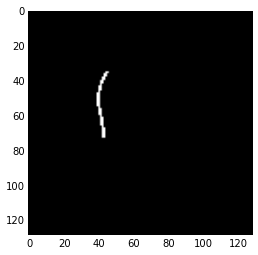

19 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0010/


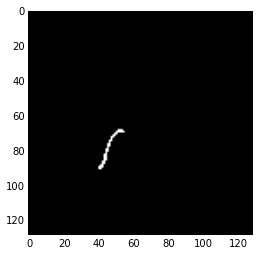

20 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0011/


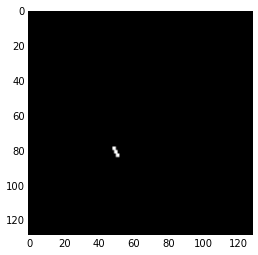

21 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0012/


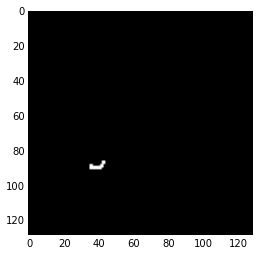

22 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0013/


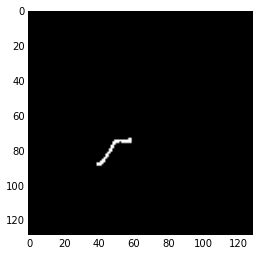

23 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0014/


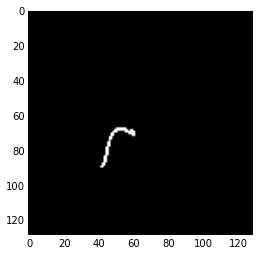

24 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0015/


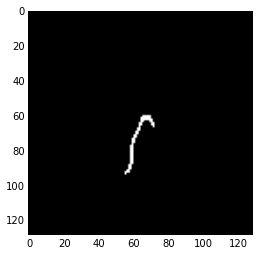

25 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0016/


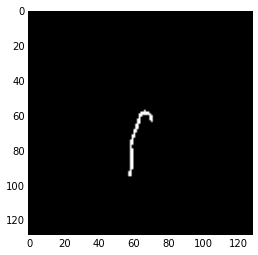

26 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0017/


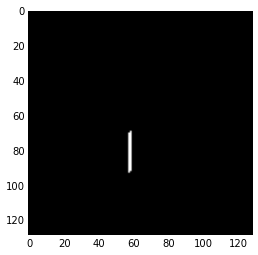

27 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0018/


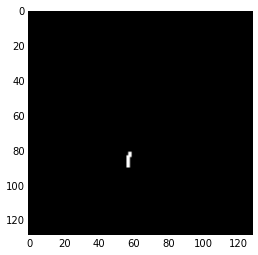

28 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0019/


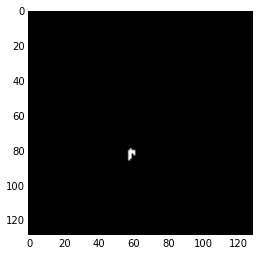

29 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0020/


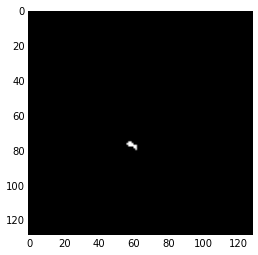

30 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0021/


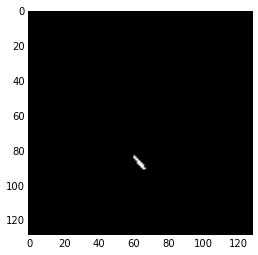

31 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0022/


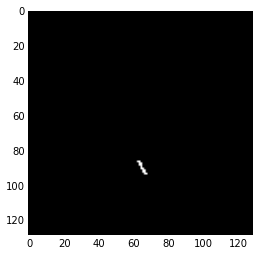

32 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0023/


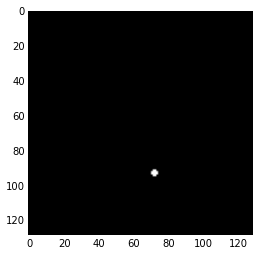

33 /Volumes/HD-PLFU3/AnalysisResult/20161019-2/C001H001S0024/


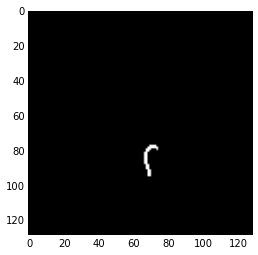

34 /Volumes/HD-PLFU3/AnalysisResult/20161019-3/C001H001S0024/


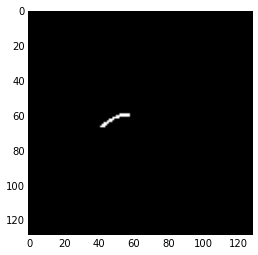

35 /Volumes/HD-PLFU3/AnalysisResult/20161019-3/C001H001S0025/


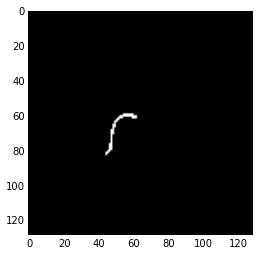

36 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0009/


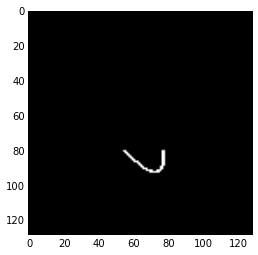

37 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0010/


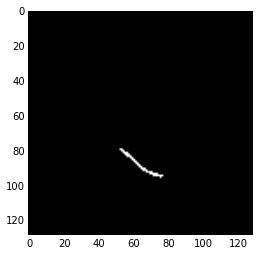

38 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0011/


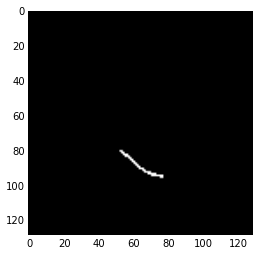

39 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0012/


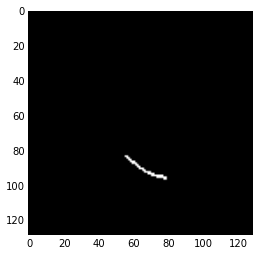

40 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0013/


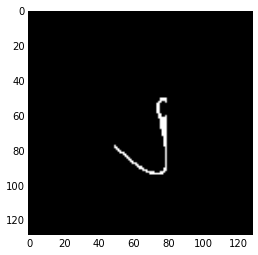

41 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0014/


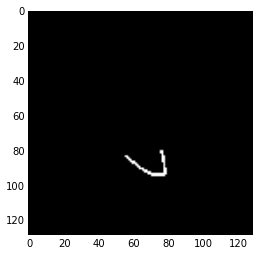

42 /Volumes/HD-PLFU3/AnalysisResult/20161021-1/C001H001S0016/


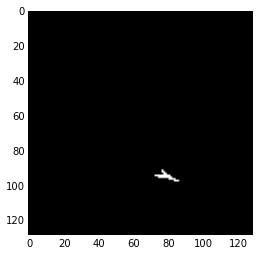

43 /Volumes/HD-PLFU3/AnalysisResult/20161021-2/C001H001S0010/


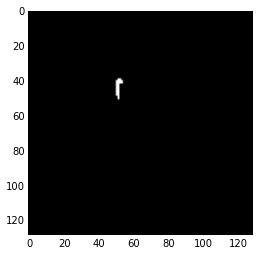

44 /Volumes/HD-PLFU3/AnalysisResult/20161021-2/C001H001S0011/


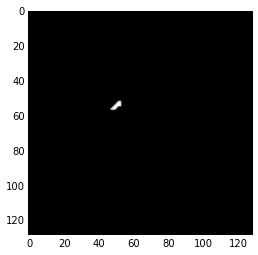

45 /Volumes/HD-PLFU3/AnalysisResult/20161021-2/C001H001S0012/


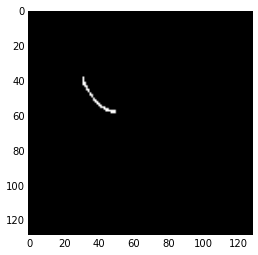

(2075,)


In [20]:
df = pd.read_csv(df_path)

list_phase = []
for i in range(len(df)):
    s = df.loc[i,:]    
    sess_dir = data_dir+"{0}/C001H001S{1:0>4}/".format(s.sample, s.session)
    print i, sess_dir
    
    core_data = np.load(sess_dir+'/core.npy')
    pmap_data = np.load(sess_dir+'/pmap.npy')
    
    core_traj = (core_data[s.frame_start:s.frame_end,:,:] >= s.core_id_min )*1
    core_traj *= (core_data[s.frame_start:s.frame_end,:,:] <= s.core_id_max )*1
    core_traj[:,:s.roi_top,:]= 0
    core_traj[:,s.roi_bottom:,:]= 0
    core_traj[:,:,:s.roi_left]= 0
    core_traj[:,:,s.roi_right:]= 0
    core_integ = np.sum( core_traj, axis=0)
    
    plt.imshow((core_integ>0), cmap='gray')
    plt.show()
    
    #np.save(sess_dir+"core_traj", core_traj)
    #plt.savefig(sess_dir+"/core_integ.png")
    
    core_index = np.array(np.where(core_integ>0)).T
    shift_phase = np.array( [ pmap_data[s.frame_start, p[0], p[1]] for p in core_index] )
    list_phase.extend(list(shift_phase))
    
list_phase = np.array(list_phase)
print list_phase.shape

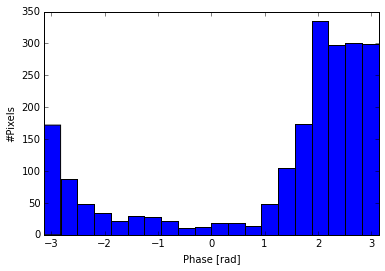

[ 172.   88.   49.   34.   21.   30.   28.   22.   10.   13.   19.   19.
   14.   48.  104.  173.  335.  297.  300.  299.]


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


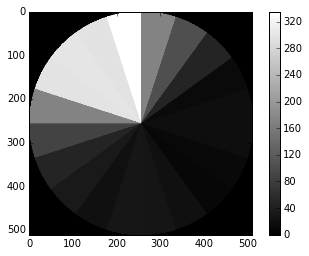

In [19]:
hist_phase, _, _ = plt.hist(list_phase, np.arange(-np.pi, np.pi+0.05*np.pi, 0.1*np.pi))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Pixels")
plt.show()

img = getAngleDensityMap(hist_phase)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()